# Проект "Поиск возможностей оптимизации маркетинговых затрат интернет-сервиса"

## Содержание

##### Часть 1. Введение:
* [1.1 Цель проекта](#section_1.1)
* [1.2 Набор данных для анализа](#section_1.2)

##### Часть 2. Изучение и предобработка данных:
* [2.1 Загрузка библиотек](#section_2.1)
* [2.2 Ознакомление с данными датафрейма Visits](#section_2.2)
* [2.3 Выводы по результатам ознакомления с датафремом Visits](#section_2.3)
* [2.4 Ознакомление с данными датафрейма Orders](#section_2.4)
* [2.5 Выводы по результатам ознакомления с датафремом Orders](#section_2.5)
* [2.6 Ознакомление с данными датафрейма Costs](#section_2.6)
* [2.7 Выводы по результатам ознакомления с датафремом Costs](#section_2.7)

##### Часть 3. Исследовательский анализ данных:
* [3.1 Метрики и отчеты по продукту: DAU, WAU, MAU, количество сессий, ASL, retention rate](#section_3.1)
* [3.2 Метрики и отчеты продаж: период до первой покупки, количество покупок за период, средний чек, LTV](#section_3.2)
* [3.3 Метрики и отчеты по затратам на рекламу: сумма затрат по источникам, CAC, ROI](#section_3.3)
* [3.4 Вывод](#section_3.4)

##### Часть 4. Рекомендации:
* [4.1 Рекомендации](#section_4.1)

## Часть 1. Введение:

<a id='section_1.1'></a>
### 1.1 Цель проекта

Цель проекта - помочь маркетологам сервиса по продаже билетов на развлекательные мероприятия оптимизировать маркетинговые затраты.

Для достижения цели планируется выполнить следующие задачи:
- изучить, как клиенты пользуются продуктом,
- получить данные о том, когда они начинают покупать,
- рассчитать, сколько денег приносит каждый клиент и сколько стоит привлечение одного клиента,
- узнать, через какой срок клиент окупается,
- выработать рекомендации по оптимизации маркетинговых затрат.

<a id='section_1.2'></a>
### 1.2 Набор данных для анализа

В нашем распоряжении имеются следующие данные с июня 2017 по конец мая 2018 года: 
- лог сервера с данными о посещениях сайта,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Описание данных:

**Таблица visits (лог сервера с информацией о посещениях сайта):**

- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор рекламного источника, из которого пришел пользователь.

**Таблица orders (информация о заказах):**

- Uid — уникальный id пользователя, который сделал заказ,
- Buy Ts — дата и время заказа,
- Revenue — выручка сервиса с этого заказа.

**Таблица costs (информация о затратах на маркетинг):**

- source_id — идентификатор рекламного источника,
- dt — дата,
- costs — затраты на этот рекламный источник в этот день.

## Часть 2. Изучение и предобработка данных:

<a id='section_2.1'></a>
### 2.1 Загрузка библиотек

В данном разделе мы загрузим неоходимые библиотеки.

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<a id='section_2.2'></a>
### 2.2 Ознакомление с данными датафрейма Visits

В данном подразделе мы загрузим и изучим данные датафрейма **Visits**, при необходимости устраним выявленные несоответствия и проведем замену типов данных. 

In [2]:
# Загрузим первый датасет и посмотрим его содержимое
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
# Проверим данные на наличие дубликатов
visits.duplicated().sum()

0

In [4]:
# Переименуем столбцы
visits.columns = ['device', 'session_end', 'source_id', 'session_start', 'uid']

In [5]:
# Посмотрим количество уникальных пользователей
visits['uid'].nunique()

228169

In [6]:
# Посмотрим информацию о данных методом info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device           359400 non-null object
session_end      359400 non-null object
source_id        359400 non-null int64
session_start    359400 non-null object
uid              359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
# Заменим типы данных
visits['session_end'] = visits['session_end'].astype('datetime64')
visits['session_start'] = visits['session_start'].astype('datetime64')
visits['uid'] = visits['uid'].astype('object')
visits['source_id'] = visits['source_id'].astype('object')

In [8]:
# Проверим результат 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device           359400 non-null object
session_end      359400 non-null datetime64[ns]
source_id        359400 non-null object
session_start    359400 non-null datetime64[ns]
uid              359400 non-null object
dtypes: datetime64[ns](2), object(3)
memory usage: 13.7+ MB


In [9]:
# Посмотрим информацию о данных в столбце 
visits['session_start'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: session_start, dtype: object

In [10]:
# Посмотрим информацию о данных в столбце 
visits['session_end'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: session_end, dtype: object

In [11]:
# Посмотрим, какие типы устройств, используют клиенты
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [12]:
# Посмотрим количество и номера уникальных рекламных источников 
visits['source_id'].unique()

array([4, 2, 5, 9, 3, 1, 10, 7, 6], dtype=object)

<a id='section_2.3'></a>
### 2.3 Выводы по результатам ознакомления с датафремом Visits

Мы изучили данные, содержащиеся в датафрейме **Visits**.

В ходе изучения мы сделали следующие выводы и наблюдения:

1. Набор данных содержит 359400 записей о визитах пользователей, совершенных в период с 1 июня 2017 года по 31 мая 2018 года.
2. При этом количество уникальных пользователей составляет 228169 человек.
3. Пользователи совершали переход на сайт с 9 рекламных источников, используя при этом компьютер либо мобильное устройство.
4. Мы провели замену типа данных в столбцах `session_start` и `session_end` на тип datetime, так как данные содержат дату и время.
5. В столбцах `source_id` и `uid` мы заменили данные на тип object, чтобы ошибочно не выполнить числовые операции с данными, которые фактически числовыми не являются.
6. Мы проверили данные на наличие дубликатов и не обнаружили таковых.

<a id='section_2.4'></a>
### 2.4 Ознакомление с данными датафрейма Orders

В данном подразделе мы загрузим и изучим данные датафрейма **Orders**, при необходимости устраним выявленные несоответствия и проведем замену типов данных. 

In [13]:
# Загрузим второй датасет и посмотрим его содержимое
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
# Проверим данные на наличие дубликатов
orders.duplicated().sum()

0

In [15]:
# Переименуем столбцы и изучим данные методом info()
orders.columns = ['purchase_time', 'revenue', 'uid']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
purchase_time    50415 non-null object
revenue          50415 non-null float64
uid              50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [16]:
# Заменим типы данных
orders['purchase_time'] = pd.to_datetime(orders['purchase_time'])
orders['uid'] = orders['uid'].astype('object')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
purchase_time    50415 non-null datetime64[ns]
revenue          50415 non-null float64
uid              50415 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [17]:
# Изучим информацию о данных в столбце
orders['purchase_time'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: purchase_time, dtype: object

In [18]:
# Посмотрим количество уникальных пользователей
orders['uid'].nunique()

36523

In [19]:
# Посмотрим сумму всех покупок
orders['revenue'].sum()

252057.19999999998

<a id='section_2.5'></a>
### 2.5 Выводы по результатам ознакомления с датафремом Orders

Мы изучили данные, содержащиеся в датафрейме **Orders**.

В ходе изучения мы сделали следующие выводы и наблюдения:

1. Набор данных содержит 50415 записей о покупках, совершенных пользователями сервиса в период с 1 июня 2017 года по 1 июня 2018 года.
2. Данные не содержат пропусков и дубликатов.
3. Количество уникальных пользователей, совершивших покупки, составляет 36523 человек.
4. Общая выручка от совершенных за период покупок соствляет 252057 условных единиц.
5. Мы провели замену типа данных в столбце `purchase_time` на тип datetime, так как данные содержат дату и время.
5. В столбце `uid` мы заменили данные на тип object, чтобы ошибочно не выполнить числовые операции с данными, которые фактически числовыми не являются.

<a id='section_2.6'></a>
### 2.6 Ознакомление с данными датафрейма Costs

В данном подразделе мы загрузим и изучим данные датафрейма **Costs**, при необходимости устраним выявленные несоответствия и проведем замену типов данных. 

In [20]:
# Загрузим третий датасет и посмотрим его содержимое
marketing_costs = pd.read_csv('/datasets/costs.csv')
marketing_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
# Проверим данные на наличие дубликатов
marketing_costs.duplicated().sum()

0

In [22]:
# Переименуем столбцы и изучим данные методом info()
marketing_costs = marketing_costs.rename(columns = {'dt': 'expense_date'})
marketing_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id       2542 non-null int64
expense_date    2542 non-null object
costs           2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [23]:
# Заменим типы данных и проверим
marketing_costs['expense_date'] = pd.to_datetime(marketing_costs['expense_date'])
marketing_costs['source_id'] = marketing_costs['source_id'].astype('object')
marketing_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id       2542 non-null object
expense_date    2542 non-null datetime64[ns]
costs           2542 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB


In [24]:
# Изучим данные в столбце методом describe()
marketing_costs['expense_date'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: expense_date, dtype: object

In [25]:
# Изучим, информация по какому количеству уникальных рекламных источников содержится в датафрейме
marketing_costs['source_id'].unique()

array([1, 2, 3, 4, 5, 9, 10], dtype=object)

In [26]:
# Посмотрим сумму всех расходов
marketing_costs['costs'].sum()

329131.62

<a id='section_2.7'></a>
### 2.7 Выводы по результатам ознакомления с датафремом Costs

Мы изучили данные, содержащиеся в датафрейме **Costs**.

В ходе изучения мы сделали следующие выводы и наблюдения:

1. Набор данных содержит 2524 записи о рекламных затратах, совершенных в период с 1 июня 2017 года по 31 мая 2018 года.
2. В наборе данных содержится информация по затратам на 6 уникальных рекламных источников из 9 встречавшихся в датафрейме **Visits**. Общая сумма затрат составила 329131,62 условных единиц.
4. Мы провели замену типа данных в столбце `expense_date` на тип datetime, так как данные содержат дату и время.
5. В столбце `source_id` мы заменили данные на тип object, чтобы ошибочно не выполнить числовые операции с данными, которые фактически числовыми не являются.
6. Мы проверили данные на наличие дубликатов и не обнаружили таковых.

## Часть 3. Исследовательский анализ данных:

<a id='section_3.1'></a>
### 3.1 Метрики и отчеты по продукту: DAU, WAU, MAU, количество сессий, ASL, retention rate

Сделаем отчеты и изучим метрики, относящиеся к продукту, такие как количество активных пользователей в день / неделю / месяц, количество сессий и коэффициент удержания пользователей.

#### DAU, WAU, MAU

In [27]:
# Выделим из даты начала сессии день, неделю, месяц и год
visits['year'] = visits['session_start'].dt.year
visits['month'] = visits['session_start'].astype('datetime64[M]')
visits['date'] = visits['session_start'].dt.date
visits['date'] = pd.to_datetime(visits['date'])
visits['week'] = (pd.to_datetime(visits['date'], unit='d') - 
                  pd.to_timedelta(visits['date'].dt.dayofweek, unit='d')
                 )

In [28]:
# Создадим функцию для построения линейного графика
def lineplot(f1, f2, series1, series2, data, title):
    plt.figure(figsize=(f1, f2))
    plt.plot(series1, series2, data=data)
    plt.grid(b=True, which='both')
    plt.xticks(rotation=45)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.show()

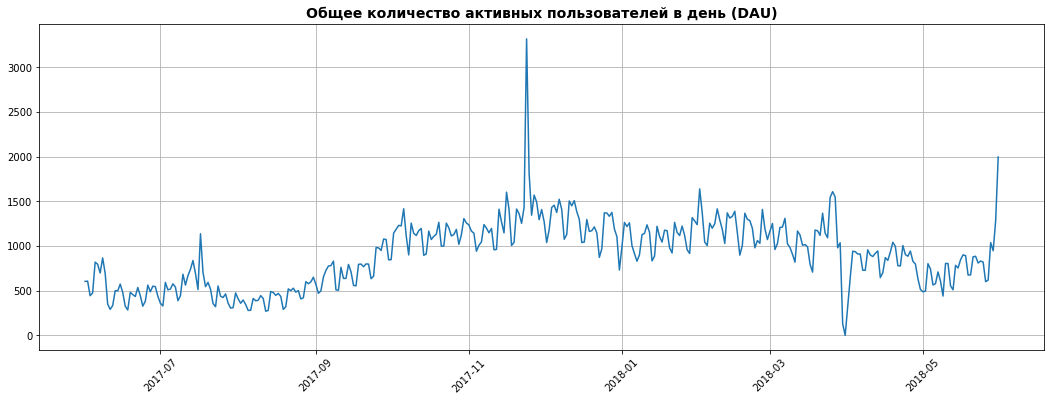

In [29]:
# Рассчитаем общее количество активных пользователей за день
dau_total = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()

# Построим график
lineplot(18, 6,
         'date', 'uid', dau_total,
         'Общее количество активных пользователей в день (DAU)')

Видим, что в целом ежедневное количество активных пользователей росло в период с августа по ноябрь 2017 года, а затем начало уменьшаться.

Кроме того, можно заменить недельные пики и падения. Изучим их более подробно - для этого рассмотрим график на отрезке 2 последних месяцев. 

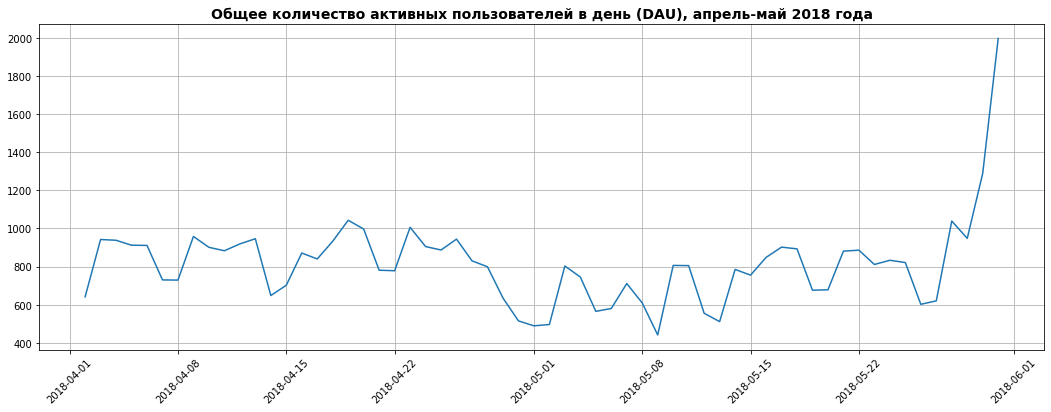

In [30]:
# Выберем нужный период
dau_total_2_months = (visits.
                      query('date > "2018-03-31"').
                      groupby('date').
                      agg({'uid': 'nunique'}).
                      reset_index()
                     )

# Построим график
lineplot(18, 6,
         'date', 'uid', dau_total_2_months,
         'Общее количество активных пользователей в день (DAU), апрель-май 2018 года')

Сопоставив график с календарем, видим, что падение активности пользователей приходится на выходные дни - это, скорее всего, связано с тем, что пользователи планируют посещение мероприятий в течение рабочей недели, а в выходные, соответственно, реже обращаются к сервису. 

Изучим, есть ли существенные различия в количестве ежедневных активных пользователей, использующих компьютеры либо мобильные устройства. 

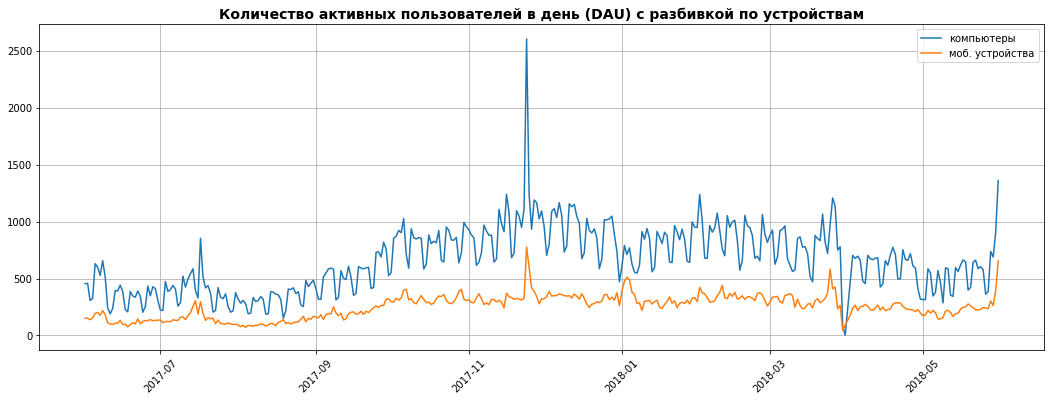

In [31]:
# Сделаем сводную таблицу по DAU с выборкой пользователей со стационарными устройствами
dau_desktop = (visits.
               query('device == "desktop"').
               groupby('date').
               agg({'uid': 'nunique'}).
               reset_index()
              )
# Сделаем сводную таблицу по DAU с выборкой пользователей со мобильными устройствами
dau_touch = (visits.
             query('device == "touch"').
             groupby('date').
             agg({'uid': 'nunique'}).
             reset_index()
             )

# Построим график
plt.figure(figsize=(18, 6))
plt.plot('date', 'uid', data=dau_desktop)
plt.plot('date', 'uid', data=dau_touch)
plt.grid(b=True)
plt.xticks(rotation=45)
plt.title('Количество активных пользователей в день (DAU) с разбивкой по устройствам', 
          fontsize=14, fontweight='bold')
plt.legend(('компьютеры', 'моб. устройства'))
plt.show()

Из данного графика можем сделать вывод, что количество пользователей, заходящих на наш сервис с помощью компьютера существенно больше, чем количество пользователей через мобильные устройства.

Однако, мы также видим, что еженедельные пики и падения для пользователей десктопов более выражены, чем еженедельные пики и падения на общем графике. Это говорит о том, что активность пользователей через мобильные устройства растет в периоды падения активности пользователей стационарных устройств и наоборот. Что, в свою очередь, говорит о том, что, возможно, большая популярность компьютеров связана с тем, что пользователи планируют свой досуг, находясь на работе в течение рабочей недели, когда они пользуются стационарным устройством.

Посмотрим, повторяет ли недельное и месячное количество активных пользователей тот же тренд, что и количество дневных пользователей.

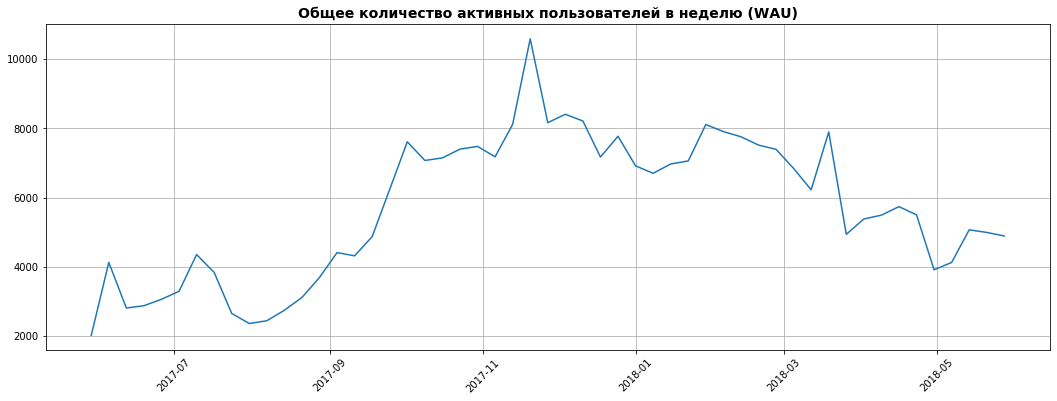

In [32]:
# Рассчитаем общее количество активных пользователей в неделю
wau_total = visits.groupby('week').agg({'uid': 'nunique'}).reset_index()

# Построим график
lineplot(18, 6,
         'week', 'uid', wau_total,
         'Общее количество активных пользователей в неделю (WAU)')

Мы видим, что есть недели, в которые активность пользователей более высокая, однако, в целом период роста и падения активных пользователей в неделю в целом с периодами, которые мы обозначили после изучения графика с количеством дневных пользователей. 

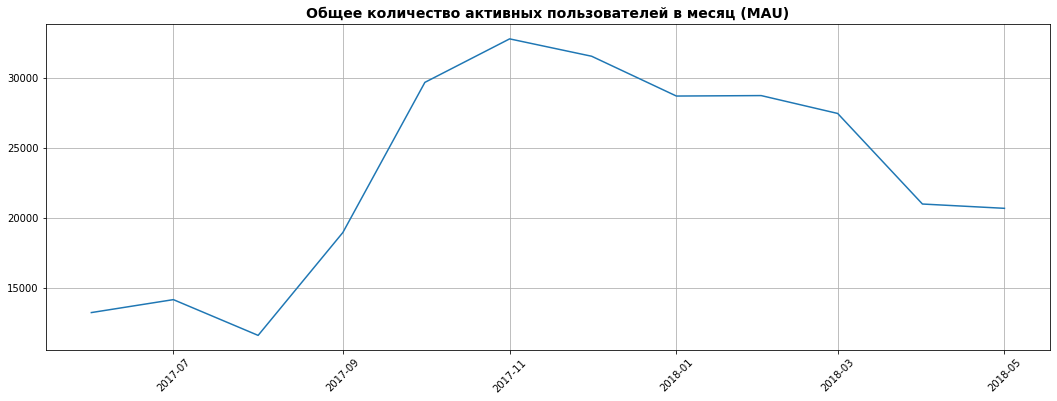

In [33]:
# Рассчитаем общее количество активных пользователей в месяц
mau_total = visits.groupby('month').agg({'uid': 'nunique'}).reset_index()

# Построим график
lineplot(18, 6,
         'month', 'uid', mau_total,
         'Общее количество активных пользователей в месяц (MAU)')

Месячный график демострирует то же самое.

Посмотрим, как распределены на месячном графике доли пользователей, заходящих с разных рекламных источников.

In [34]:
# Сделаем сводную таблицу
mau_source = (visits.
              pivot_table(index='month', 
                          columns='source_id', 
                          values='uid',
                          aggfunc='nunique')
              )

# Заполним пропущенные значения нулями
mau_source = mau_source.fillna(0)

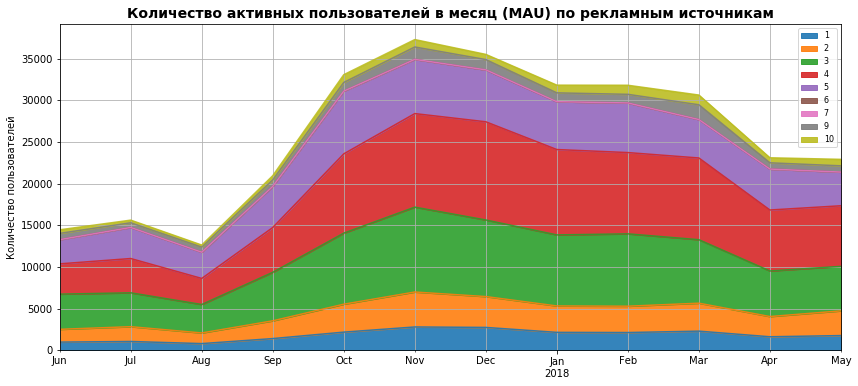

In [35]:
# Построим диаграмму с областями накопления
mau_source.plot.area(figsize=(14,6), alpha=0.9)
plt.title('Количество активных пользователей в месяц (MAU) по рекламным источникам', 
          fontsize=14, fontweight='bold')
plt.ylabel('Количество пользователей')
plt.xlabel('')
plt.grid(b=True, which='both')
plt.legend(title='', fontsize=8)
plt.show()

Мы видим, что основная часть наших пользователей приходит с источников 4, 3, 5. Небольшое количество приходит с источников 2, 1, 9, 10. Пользователи с источников 6-7 единичны.

Также можно отметить, что доли источников в общем количестве пользователей довольно постоянны - то есть, если количество пользователей растет, то оно растет по всем активным источникам, и аналогичным образом снижается.

При последующем анализе сопоставим эти данные с рекламными расходами на каждый источник.

#### Количество сессий

Посмотрим, как часто пользователи посещают наш сервис. 

In [36]:
# Сформируем сводную таблицу с количеством посещений и количеством уникальных пользователей помесячно
sessions_per_user = visits.groupby(['year', 'month']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['no_sessions', 'no_users']

# Рссчитаем, сколько посещений приходится в месяц на уникального пользователя
sessions_per_user['no_sessions_per_user'] = (sessions_per_user['no_sessions'] / 
                                             sessions_per_user['no_users']
                                            )
# Посмотрим данные о среднем и медианном количестве посещений методом describe()
sessions_per_user['no_sessions_per_user'].describe()

count    12.000000
mean      1.280889
std       0.032217
min       1.234202
25%       1.259190
50%       1.281448
75%       1.294672
max       1.340641
Name: no_sessions_per_user, dtype: float64

Среднее количество посещений в месяц на пользователя, как и медиана, составляет - 1,28.
Из полученных данных следует, что большинство пользователей заходит на наш сервис не чаще, чем 1 раз в месяц. 

#### Продолжительность сессий

Посмотрим, сколько времени пользователи проводят на нашем сервисе.

In [37]:
# Создадим столбец с расчетом длительности сессии
visits['session_length'] = visits['session_end'] - visits['session_start']

In [38]:
# Посмотрим информацию о полученных данных методом describe()
visits['session_length'].describe()

count                    359400
mean     0 days 00:10:43.025687
std      0 days 00:16:37.127760
min           -1 days +23:14:00
25%             0 days 00:02:00
50%             0 days 00:05:00
75%             0 days 00:14:00
max             0 days 11:51:00
Name: session_length, dtype: object

Мы обнаружили сессии с отрицательной продолжительностью. Изучим их подробнее.

In [39]:
# Сделаем выборку сессий с отричательной продолжительностью
visits[visits['session_length'] < '0 days']

,device,session_end,source_id,session_start,uid,year,month,date,week,session_length
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,2018-03-01,2018-03-25,2018-03-19,-1 days +23:28:00
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,2018-03-01,2018-03-25,2018-03-19,-1 days +23:14:00


Мы видим, что время окончания сессии меньше времени начала сессии. Судя по дате и времени, это связано с тем, что в течение сессии на устройстве пользователя произошел перевод времени на час назад. 

Скорректируем продолжительность сессии для данных случаев в дальнейшем, добавив к продолжительности сессий 1 час, чтобы компенсировать перевод часов на час назад.

In [40]:
# Переведем длительность сессий в секунды
visits['session_length_min'] = visits['session_length'] / np.timedelta64(1, 's') / 60
visits['session_length_min'] = visits['session_length_min'].astype('int32')

In [41]:
# Добавим к отрицательной продолжительности сессий 1 час, 
# чтобы компенсировать перевод часов на час назад
visits.loc[visits['session_length'] < '0 days', 'session_length_min'] = (visits['session_length_min']
                                                                         + 60
                                                                        )
# Проверим полученную длительность сессий
visits[visits['session_length'] < '0 days']

,device,session_end,source_id,session_start,uid,year,month,date,week,session_length,session_length_min
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,2018-03-01,2018-03-25,2018-03-19,-1 days +23:28:00,28
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,2018-03-01,2018-03-25,2018-03-19,-1 days +23:14:00,14


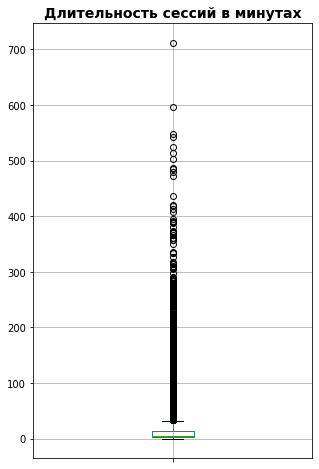

In [42]:
visits.boxplot(column='session_length_min', figsize=(5, 8))
plt.title('Длительность сессий в минутах', fontsize=14, fontweight='bold')
plt.xticks([1], [''])
plt.show()

In [43]:
visits['session_length_min'].describe()

count    359400.000000
mean         10.716664
std          16.618886
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_length_min, dtype: float64

In [44]:
np.percentile(visits['session_length_min'], 95)

38.0

Исходя из полученных данных, 50% сессий длится не более 5 минут, еще 25% - от 5 до 14 минут. Всего 5% сессий длятся более 38 минут. 

#### Удержание пользователей

Сначала посмотрим, какой процент пользователей пользуется нашим сервисом больше одного раза.

In [45]:
# Сделаем сводную таблицу с количеством визитов каждого пользователя
no_sessions_per_user = visits.groupby('uid').agg({'session_start': 'count'}).reset_index()
no_sessions_per_user.columns = ['uid', 'no_sessions']

# Посчитаем процент пользователей от общего количества, у которых более 1 визита
repeat_users = len(no_sessions_per_user.query('no_sessions > 1')) / len(no_sessions_per_user) * 100
repeat_users

22.84622363248294

Получается, что только примерно 23% пользователей пользуются нашим сервисом более 1 раза.

Изучим удержание пользователей с разбивкой по месячным когортам.

In [46]:
# Создадим сводную таблицу с временем первого визита для каждого пользователя
first_visit = visits.groupby('uid').agg({'session_start': 'min'}).reset_index()
first_visit.columns = ['uid', 'first_session_time']
first_visit.head()

,uid,first_session_time
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [47]:
# Добавим информацию о времени первого визита в таблицу с общей информацией о визитах 
visits = visits.merge(first_visit, on='uid')

# Выделим из времени первого визита месяц
visits['first_session_month'] = visits['first_session_time'].astype('datetime64[M]')

In [48]:
# Для каждого визита пользователя добавим информацию о сроке жизни его когорты в месяцах
visits['cohort_lifetime'] = visits['month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [49]:
# Сформируем сводную таблицу с количеством пользователей когорты в каждый месяц ее жизни
cohorts = (visits.
           groupby(['first_session_month','cohort_lifetime']).
           agg({'uid':'nunique'}).
           reset_index()
          )

In [50]:
# Соберем сводную таблицу с количеством пользователей в первый (нулевой) месяц жизни когорты 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [51]:
# Добавим инфомрацию о первоначальном количестве пользователей когорты в общую таблицу с ежемесячным
# количеством пользователей
cohorts = cohorts.merge(initial_users_count, on='first_session_month') 

In [52]:
# Рассчитаем долю пользователей когорты, возвращающихся каждый месяц
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

# Создадим сводную таблицу  
retention_pivot = (cohorts.
                   pivot_table(index='first_session_month',
                               columns='cohort_lifetime',
                               values='retention',
                               aggfunc='sum')
                  )

# Удалим нулевой столбец, чтобы сделать график более информативным,
# так как удержание в нулевой месяц всегда равно 100%
retention_pivot = retention_pivot.drop(columns=[0])

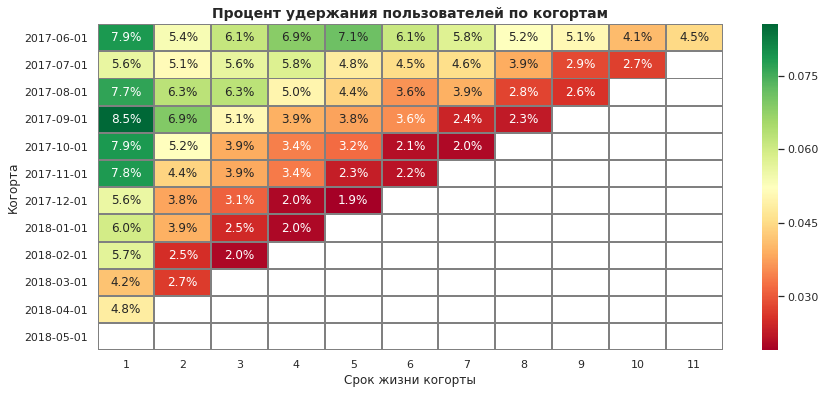

In [53]:
# Создадим "тепловую карту" с ежемесячным процентом удержания
sns.set(style='white')
plt.figure(figsize=(14, 6))
plt.title('Процент удержания пользователей по когортам', fontsize=14, fontweight='bold')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', 
            yticklabels=retention_pivot.index.strftime('%Y-%m-%d'), cmap='RdYlGn')
plt.ylabel('Когорта')
plt.xlabel('Срок жизни когорты')
plt.show()

Когортный анализ показывает, что процент удержания пользователей уже во втором месяце составляет не более 8,5% с дальнейшей тенденцией к снижению. 
Кроме того, можно отметить, что в последние 5 месяцев изучаемого периода уровень удержания значительно снизился. 

<a id='section_3.2'></a>
### 3.2 Метрики и отчеты продаж: период до первой покупки, количество покупок за период, средний чек, LTV

В этой части мы проанализируем метрики продаж: сколько времени занимает принятие решения о покупке, сколько покупок совершают пользователи, каков средний чек и LTV нашего клиента.

#### Время до первой покупки

In [54]:
# Создадим таблицу, в которой соберем время первого заказа для каждого пользователя
first_order = orders.groupby('uid').agg({'purchase_time': 'min'}).reset_index()
first_order.columns = ['uid', 'first_purchase']

In [55]:
# Объединим данные о времени первой покупки с данными о времени первого визита 
time_to_purchase = first_order.merge(first_visit, on='uid')

In [56]:
# Посчитаем количество минут от времени первого визита до времени первой покупки
time_to_purchase['time_to_purchase'] = ((time_to_purchase['first_purchase'] - time_to_purchase['first_session_time']) / 
                                        np.timedelta64(1, 's') / 60
                                       )
time_to_purchase['time_to_purchase'] = time_to_purchase['time_to_purchase'].astype('uint16')

# Изучим полученные данные
time_to_purchase['time_to_purchase'].describe() 

count    36523.000000
mean      6511.254442
std      14414.400956
min          0.000000
25%          4.000000
50%         16.000000
75%       2659.000000
max      65533.000000
Name: time_to_purchase, dtype: float64

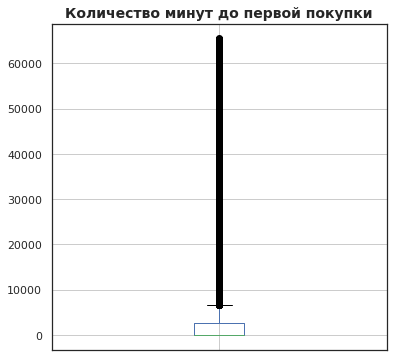

In [57]:
# Визуализируем полученные данные с помощью диаграммы "ящик с усами"
time_to_purchase.boxplot(column='time_to_purchase', figsize=(6, 6))
plt.title('Количество минут до первой покупки', fontsize=14, fontweight='bold')
plt.xticks([1], [''])
plt.show()

Мы видим, что 50% клиентов, которые совершали покупки, совершили свою первую покупку в течение 16 минут со времени первого визита, 75%  - в течение первых 44 часов с момента первого визита, у оставшихся 25% клиентов принятие решения занимает до 1,5 месяцев. 

#### Количество покупок за период

In [58]:
# Соберем инфомрацию об источнике, с которого пользователь впервые зашел на наш сервис
sources_per_user = (visits.
                    sort_values(by='session_start').
                    groupby('uid').
                    agg({'source_id': 'first'})
                   )

In [59]:
# Соберем инфомрацию об устройствах пользователей, с которых они заходили впервые на наш сервис
device = (visits.
          sort_values(by='session_start').
          groupby('uid').
          agg({'device': 'first'}).
          reset_index()
          )

In [60]:
# ОБъединим данные по покупкам с данными по источникам и устройствам
purchase_data = (orders.
                 merge(sources_per_user, how='left', on='uid').
                 merge(device, how='left', on='uid')
                )


In [61]:
# Проверим, не произошло ли дублирования каких-либо данных при объединении
purchase_data['revenue'].sum()

252057.19999999998

In [62]:
# Сделаем таблицу с количеством покупок с разбивкой по источникам и устройствам
purchase_data_source = purchase_data.groupby(['device', 'source_id', 'uid']).agg({'purchase_time': 'count'}).reset_index()
purchase_data_source.columns = ['device', 'source_id', 'uid', 'no_of_purchases']

In [63]:
# Сделаем сводную таблицу со средним количеством покупок с разбивкой по источникам и устройствам
purchase_data_source_pivot = (purchase_data_source.
                              pivot_table(index='device', 
                                          columns='source_id', 
                                          values='no_of_purchases', 
                                          aggfunc='mean').
                              round(2).fillna(0)
                             )
purchase_data_source_pivot

source_id,1,2,3,4,5,7,9,10
device,,,,,,,,
desktop,1.91,1.97,1.27,1.24,1.38,1.0,1.53,1.16
touch,1.41,1.36,1.28,1.28,1.26,0.0,1.42,1.22


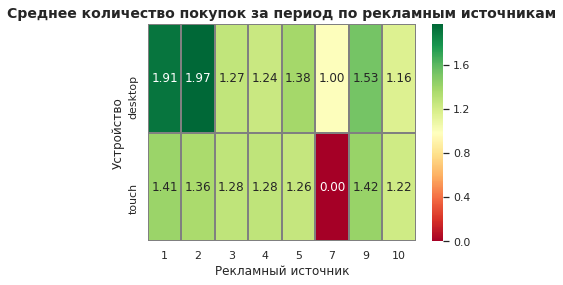

In [64]:
# Визуализируем данные на "тепловой карте"
sns.set(style='white')
plt.title('Среднее количество покупок за период по рекламным источникам', fontsize=14, fontweight='bold')
sns.heatmap(purchase_data_source_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', 
            cmap='RdYlGn')
plt.ylabel('Устройство')
plt.xlabel('Рекламный источник')
plt.show()

В целом видим, что чаще пользователи покупают со стациоарных устройство - это коррелирует с результатами анализа ранее, которые показали, что большая часть наших пользователей приходит со стационарных устройств.

Из рекламных источников, с которых переходят пользователи чаще совершающие покупки, можно выделить источники под номерами 1, 2 и 9.

#### Cредний чек

In [65]:
# Выделим месяц покупки
purchase_data['purchase_month'] = purchase_data['purchase_time'].astype('datetime64[M]')

In [66]:
# Рассчитаем средний чек пользователя по месяцам
monthly_rpu = purchase_data.groupby(['purchase_month', 'uid']).agg({'revenue': 'sum'}).reset_index()
monthly_arrpu = monthly_rpu.groupby('purchase_month').agg({'revenue': 'mean'}).reset_index()

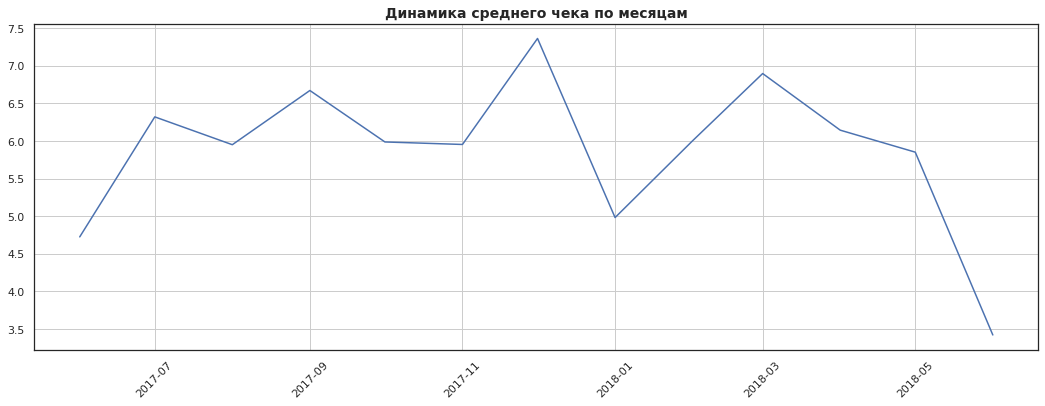

In [67]:
# Визуализируем данные на графике
lineplot(18, 6,
         'purchase_month', 'revenue', monthly_arrpu,
         'Динамика среднего чека по месяцам')

Средний чек составляет от 4,7 у.е. до 7,4 у.е. 

Динамика среднего чека выглядит вполне логично и, похоже, объясняется общими трендами - увеличение в декабре (планирование мероприятий на период новогодних каникул), спад в январе (после окончания новогодних праздников) и июне (период начала отпусков и окончания театральных сезонов в части театров).

#### LTV для когорт по времени первых покупок

In [68]:
# Объединим данные о покупках с данными о первых заказах
purchase_data_ltv = (purchase_data.
                     drop(columns=['device']).
                     merge(first_order, on='uid').
                     reset_index()
                    )

# Выделим месяц первого заказа
purchase_data_ltv['first_purchase_month'] = purchase_data_ltv['first_purchase'].astype('datetime64[M]')

purchase_data_ltv.head()

,index,purchase_time,revenue,uid,source_id,purchase_month,first_purchase,first_purchase_month
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [69]:
# Посчитаем сумму ежемесячных продаж для каждой месячной когорты
cohorts = purchase_data_ltv.groupby(['first_purchase_month','purchase_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_purchase_month,purchase_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [70]:
# Сделаем таблицу с размерами когорт
cohort_sizes = purchase_data_ltv.groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'cohort_size']
cohort_sizes

,first_purchase_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [71]:
# Объеиним данные по продажам по когортам с данными о размерах когорт
ltv_report = cohorts.merge(cohort_sizes, on='first_purchase_month')

In [72]:
# Добавим данные о сроке жизни каждой когорты
ltv_report['cohort_lifetime'] = ((ltv_report['purchase_month'] - 
                                ltv_report['first_purchase_month']) / 
                                np.timedelta64(1, 'M')
                                )
ltv_report['cohort_lifetime'] = ltv_report['cohort_lifetime'].round().astype('int')

In [73]:
# Рассчитаем среднее LTV покупателя для каждой когорты
ltv_report['ltv'] = ltv_report['revenue'] / ltv_report['cohort_size']

In [74]:
# Сделаем сводную таблицу с ежемесячным LTV 
ltv_report_pivot = (ltv_report.
                    pivot_table(index='first_purchase_month',
                                columns='cohort_lifetime',
                                values='ltv', 
                                aggfunc='sum').
                    round(2)
                   )

# Рассчитаем накопительный LTV 
ltv_report_pivot = ltv_report_pivot.cumsum(axis=1)
ltv_report_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


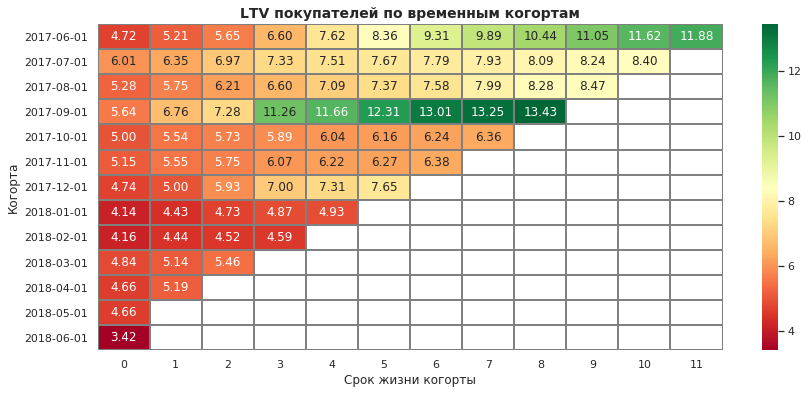

In [75]:
# Визуализируем данные с помощью "тепловой карты" 
sns.set(style='white')
plt.figure(figsize=(14, 6))
plt.title('LTV покупателей по временным когортам', fontsize=14, fontweight='bold')
sns.heatmap(ltv_report_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', 
            yticklabels=ltv_report_pivot.index.strftime('%Y-%m-%d'), cmap='RdYlGn')
plt.ylabel('Когорта')
plt.xlabel('Срок жизни когорты')
plt.show()

Анализ LTV по месячным когортам показывает, что продажи среди когорт появившихся, начиная с января, практически не растут.

Наилучшие показатели LTV имеет когорта пользователей, впервые совершивших покупку в сентябре 2017 года. Необходимо уточнить - возможно, данной коорте предоставлялись какие-то льготные условия / специальные предложения, которые можно распространить на других покупателей.

#### LTV для когорт по рекламным источникам

In [76]:
# Рассчитаем срок жизни когорт
purchase_data_ltv['lifetime'] = ((purchase_data_ltv['purchase_month'] - purchase_data_ltv['first_purchase_month']) / 
                                 np.timedelta64(1, 'M')
                                )
purchase_data_ltv['lifetime'] = purchase_data_ltv['lifetime'].round().astype('int')

In [77]:
# Сделаем сводную таблицу с суммой продаж по каждому источнику
ltv_sources = purchase_data_ltv.pivot_table(index='source_id',
                                           columns='lifetime',
                                           values='revenue',
                                           aggfunc='sum').fillna(0)

# Сделаем сумму продаж накопительной
ltv_sources = ltv_sources.cumsum(axis=1)

In [78]:
# Посчитаем размеры когорт, разделенных по источникам
source_cohort_sizes = (purchase_data_ltv.
                groupby('source_id').
                agg({'uid': 'nunique'}).
                reset_index()
                )
source_cohort_sizes.columns = ['source_id', 'cohort_size']

In [79]:
# Объединим данные о продажах с данными о размерах когорт 
ltv_sources = ltv_sources.merge(source_cohort_sizes, on='source_id')
ltv_sources.index = ltv_sources['source_id']

# Посчитаем LTV пользователя для каждой когорты
ltv_sources = ltv_sources.div(ltv_sources['cohort_size'], axis=0).drop(columns=['cohort_size', 'source_id'])
ltv_sources

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,6.244695,7.166385,7.953846,8.681828,9.086419,9.339276,9.596816,9.963008,10.291059,10.484905,10.615085,10.724577
2,6.610839,8.028970,9.635428,11.248500,11.949404,12.480901,12.847085,13.044324,13.176392,13.242119,13.354760,13.383802
3,4.488594,4.758397,4.903573,5.002216,5.073268,5.120814,5.147826,5.172679,5.191353,5.198539,5.202970,5.204931
4,4.555284,4.742112,4.837758,4.969371,5.070009,5.180220,5.352530,5.392929,5.411978,5.451280,5.503280,5.506685
5,4.840905,5.093303,5.299071,6.799773,6.998036,7.241711,7.367771,7.454008,7.504846,7.572886,7.586096,7.592558
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.892509,4.175037,4.452335,4.674706,4.817647,4.945496,5.054072,5.136324,5.267739,5.284972,5.293566,5.293566
10,3.163792,3.228856,3.256298,3.294959,3.312897,3.322897,3.331309,3.343574,3.346102,3.348631,3.348631,3.348631


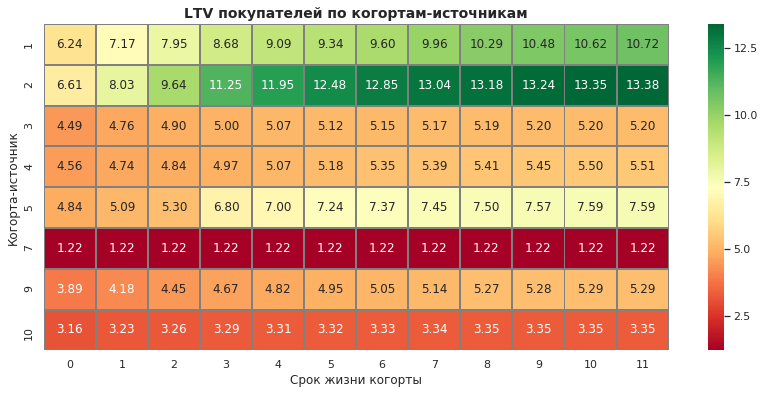

In [80]:
# Визуализируем данные с помощью "тепловой карты" 
sns.set(style='white')
plt.figure(figsize=(14, 6))
plt.title('LTV покупателей по когортам-источникам', fontsize=14, fontweight='bold')
sns.heatmap(ltv_sources, annot=True, fmt='.2f', linewidths=1, linecolor='gray', 
            cmap='RdYlGn')
plt.ylabel('Когорта-источник')
plt.xlabel('Срок жизни когорты')
plt.show()

Из визуализации наглядно видно, что пользователи, которые приходят из источников 2, 1, 5 имеют наибольшую LTV cоответственно.

<a id='section_3.3'></a>
### 3.3 Метрики и отчеты по затратам на рекламу: сумма затрат по источникам, CAC, ROMI

#### Затраты на рекламу

In [81]:
# Выделим месяц, в который производились расходы
marketing_costs['month'] = marketing_costs['expense_date'].astype('datetime64[M]')

In [82]:
# Сделаем сводную таблицу с рекламными затратами помесячно по источникам
marketing_costs_sources = marketing_costs.groupby('source_id').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

marketing_costs_sources

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


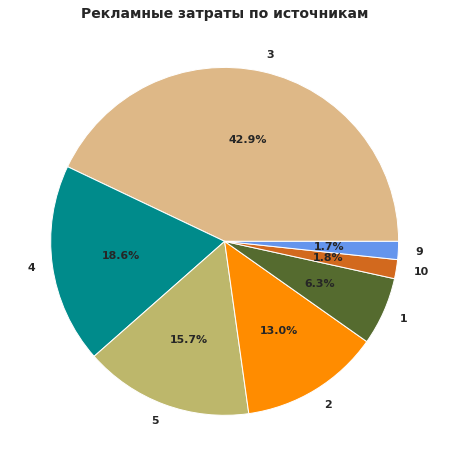

In [83]:
# Визуализируем данные с помощью диаграммы "пирог"
colors = ['burlywood', 'darkcyan', 'darkkhaki', 
          'darkorange', 'darkolivegreen', 'chocolate', 
          'cornflowerblue']
plt.figure(figsize=(8, 8))
plt.pie('costs', 
        colors=colors, 
        labels=marketing_costs_sources.index.to_list(),
        textprops={'fontsize': 11, 'fontweight': 'bold'},
        autopct='%1.1f%%', 
        pctdistance=0.6, 
        data=marketing_costs_sources)
plt.title('Рекламные затраты по источникам', fontsize=14, fontweight='bold')
plt.show()

Из таблицы и визуализации видно, что самые большие затраты на рекламу приходятся на источники 3, 4, 5 (в порядке убывания затрат). 

In [84]:
sales_per_source = (purchase_data_ltv.
                    groupby('source_id').
                    agg({'revenue': 'sum'}).
                    sort_values(by='revenue', ascending=False)
                   )
sales_per_source

,revenue
source_id,
4,56696.83
3,54511.24
5,52624.02
2,46923.61
1,31090.55
9,5759.40
10,4450.33
7,1.22


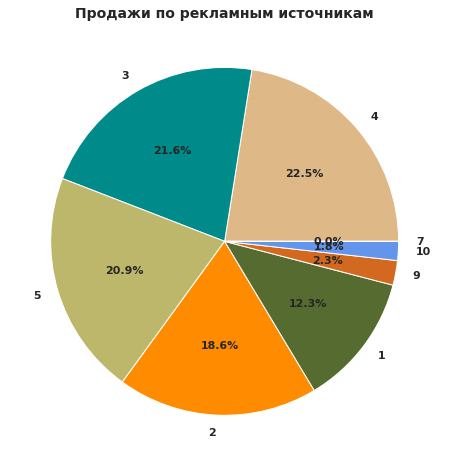

In [85]:
# Визуализируем данные с помощью диаграммы "пирог"
colors = ['burlywood', 'darkcyan', 'darkkhaki', 
          'darkorange', 'darkolivegreen', 'chocolate', 
          'cornflowerblue']
plt.figure(figsize=(8, 8))
plt.pie('revenue', 
        colors=colors, 
        labels=sales_per_source.index.to_list(),
        textprops={'fontsize': 11, 'fontweight': 'bold'},
        autopct='%1.1f%%', 
        pctdistance=0.6, 
        data=sales_per_source)
plt.title('Продажи по рекламным источникам', fontsize=14, fontweight='bold')
plt.show()

В продажах же примерно равные части выручки приходятся на источники 4, 3, 5 и 2.

In [86]:
# Сделаем сводную таблицу с общими затратами на маркетинг помесячно
marketing_costs_per_month = (marketing_costs.
                             groupby('month').
                             agg({'costs': 'sum'}).
                             reset_index()
                            )

# Сделаем сводную таблицу с общими продажами помесячно
sales_per_month = (purchase_data_ltv.
                   query('purchase_month < "2018-06-01"').
                   groupby('purchase_month').
                   agg({'revenue': 'sum'}).reset_index()
                  )

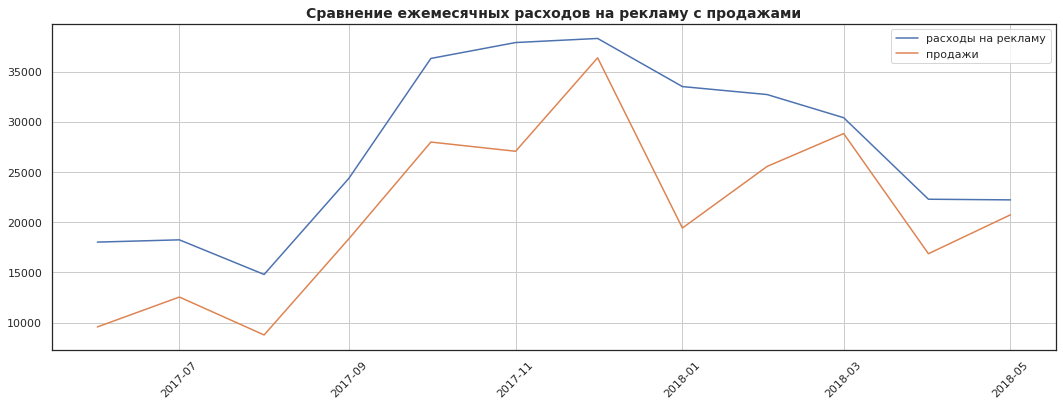

In [87]:
# Построим график для визуализации ежемесячной динамики затрат и продаж
plt.figure(figsize=(18, 6))
plt.plot('month', 'costs', data=marketing_costs_per_month)
plt.plot('purchase_month', 'revenue', data=sales_per_month)
plt.grid(b=True)
plt.xticks(rotation=45)
plt.title('Сравнение ежемесячных расходов на рекламу с продажами', 
          fontsize=14, fontweight='bold')
plt.legend(('расходы на рекламу', 'продажи'))
plt.show()

Графики, на которых отображены суммы ежемесячных затрат на рекламу и ежемесячной выручки, демонстрируют, что в течение всего года затраты на рекламу превышали нашу выручку.

#### Стоимость привлечения одного покупателя (CAC)

In [88]:
# Считаем общие затраты по источникам и объединяем с данными по размерам когорт
cac = marketing_costs.groupby('source_id').agg({'costs': 'sum'}).merge(source_cohort_sizes, on='source_id').reset_index()

# Находим стоимость привлечения одного покупателя
cac['cac'] = cac['costs'] / cac['cohort_size']
cac.sort_values(by='cac', ascending=False)

,index,source_id,costs,cohort_size,cac
2,2,3,141321.63,10473,13.493901
1,1,2,42806.04,3506,12.209367
4,4,5,51757.10,6931,7.467479
0,0,1,20833.27,2899,7.186364
3,3,4,61073.60,10296,5.931779
5,5,9,5517.49,1088,5.071222
6,6,10,5822.49,1329,4.381106


Самая высокая стоимость привлечения у источников 3 и 2, за ними примерно следуют источники 5 и 1 с примерно равной стоимостью привлечения клиента.

#### Окупаемость расходов на рекламу (ROMI)

Рассчитаем показатель ROMI  и узнаем, для каких источников затраты на рекламу окупились.

In [89]:
# Объединяем данные по LTV по источникам помесячно с данными по CAC
romi = ltv_sources.merge(cac[['cac', 'source_id']], left_on=ltv_sources.index, right_on='source_id')
romi.index = romi['source_id']

# Находим коэффициент ROMI
romi = romi.div(romi['cac'], axis=0).drop(columns=['cac', 'source_id'])
romi

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.868964,0.997220,1.106797,1.208097,1.264397,1.299583,1.335420,1.386377,1.432026,1.459000,1.477115,1.492351
2,0.541456,0.657607,0.789183,0.921301,0.978708,1.022240,1.052232,1.068387,1.079204,1.084587,1.093813,1.096191
3,0.332639,0.352633,0.363392,0.370702,0.375968,0.379491,0.381493,0.383335,0.384718,0.385251,0.385579,0.385725
4,0.767946,0.799442,0.815566,0.837754,0.854720,0.873300,0.902348,0.909159,0.912370,0.918996,0.927762,0.928336
5,0.648265,0.682064,0.709620,0.910585,0.937135,0.969766,0.986648,0.998196,1.005004,1.014115,1.015884,1.016750
9,0.767568,0.823280,0.877961,0.921810,0.949997,0.975208,0.996618,1.012837,1.038751,1.042150,1.043844,1.043844
10,0.722145,0.736996,0.743259,0.752084,0.756178,0.758461,0.760381,0.763180,0.763757,0.764335,0.764335,0.764335


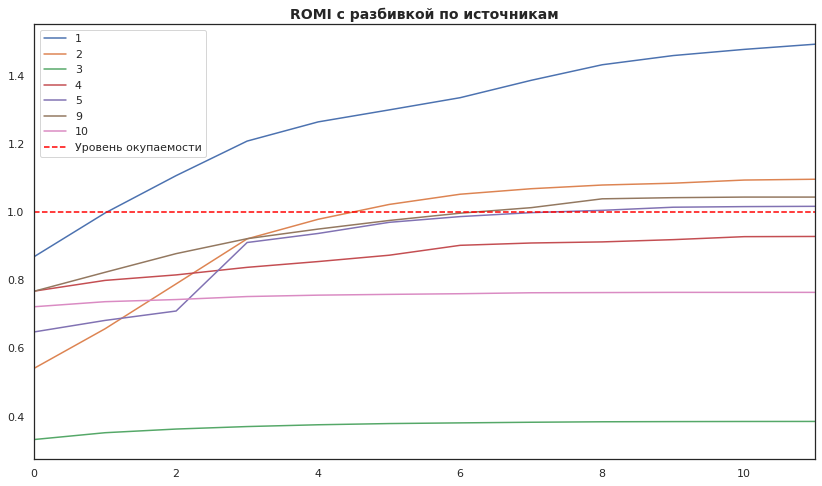

In [90]:
# Визуализируем даныне на графике
romi.T.plot(figsize=(14, 8))
plt.axhline(y=1, linestyle='--', label='Уровень окупаемости', color='red')
plt.legend()
plt.title('ROMI с разбивкой по источникам', fontweight='bold', fontsize=14)
plt.show()

Из графика можем сделать вывод, что начиная со второго месяца окупились затраты на источник 1. Затраты на данный источник имеют самый высокий уровень окупаемости.

Затраты на источник 2 окупились примерно на 5-6 месяце, а на источники 5 и 9 - в 7-8 месяце, и их окупаемость очень невысокая. 

Остальные источники за год не достигли уровня окупаемости.

<a id='section_3.4'></a>
### 3.4 Вывод

**Метрики по продукту** 

Проанализировав данные, мы сделали следующие выводы и наблюдения:

1. Ежедневное количество активных пользователей росло в период с августа по ноябрь 2017 года, а затем начало уменьшаться. Аналогичные тренды выявлены при изучении недельного и месячного количества активных пользователей. 

2. Падение активности пользователей приходится на выходные дни, что, скорее всего, связано с тем, что пользователи планируют посещение мероприятий в течение рабочей недели, а в выходные, соответственно, реже обращаются к сервису. 

3. Наши пользователи чаще используют стационарные устройства для посещения нашего сервиса. Однако, периоды роста и падения активности пользователей, заходящих с разных типов устройств, говорят о том, что, возможно, большая популярность компьютеров связана с тем, что пользователи планируют свой досуг, находясь на работе в течение рабочей недели, когда они пользуются стационарным устройством.

4. Основная часть наших пользователей приходит с источников 4, 3, 5. Небольшое количество приходит с источников 2, 1, 9, 10. Пользователи с источников 6-7 единичны. Доли источников в общем количестве пользователей довольно постоянны в разные месяцы - то есть, если количство пользователей растет, то оно растет по всем активным источникам, и аналогичным образом снижается.

5. Среднее количество посещений в месяц на пользователя, как и медиана, составляет - 1,28, то есть большинство пользователей заходит на наш сервис не чаще чем 1 раз в месяц. 

6. 50% сессий длится не более 5 минут, еще 25% - от 5 до 14 минут. Всего 5% сессий длятся более 38 минут. 

7. Примерно 23% пользователей пользуются нашим сервисом более 1 раза. Когортный анализ показывает, что процент удержания пользователей уже во втором месяце составляет не более 8,5% с дальнейшей тенденцией к снижению. Кроме того, можно отметить, что в последние 5 месяцев изучаемого периода уровень удержания значительно снизился. 


**Метрики продаж** 

Проанализировав данные, мы сделали следующие выводы и наблюдения:

1. 50% клиентов, которые совершали покупки, совершили свою первую покупку в течение 16 минут со времени первого визита, 75%  - в течение первых 44 часов с момента первого визита, у оставшихся 25% клиентов принятие решения занимает до 1,5 месяцев. 

2. Чаще пользователи покупают со стационарных устройство - это коррелирует с данными о том, что большая часть наших пользователей приходит со стационарных устройств.

3. Из рекламных источников, с которых переходят пользватели чаще совершающие покупки, можно выделить источники под номерами 1, 2 и  9.

4. Средний чек составляет от 4,7 у.е. до 7,4 у.е. 

5. Динамика среднего чека выглядит вполне логично и, похоже, объясняется общими трендами - увеличение в декабре (планирование мероприятий на период новогодних каникул), спад в январе (после окончания новогодних праздников) и июне (период начала отпусков и окончания театральных сезонов во части театров). 

6. Анализ LTV по месячным когортам показывает, что продажи среди когорт появившихся, начиная с января, практически не растут. Наилучшие показатели LTV имеет когорта пользователей, впервые совершивших покупку в сентябре 2017 года. Необходимо уточнить - возможно, данной когорте предоставлялись какие-то льготные условия / специальные предложения, которые можно распространить на других покупателей.

7. Когортный анализ по рекламным источникам, показывает, что покупатели, которые приходят из источников 2, 1, 5 имеют наибольшую LTV cоответственно.


**Метрики рекламных затрат** 

1. Самые большие затраты на рекламу приходятся на источники 3, 4, 5 (в порядке убывания затрат). При этом в выручке примерно равные части приходятся на источники 4, 3, 5 и 2.

2. Помесячное сравнение суммы затрат на рекламу и выручки, демонстрируют, что в течение всего года затраты на рекламу превышали выручку. 

3. Самая высокая стоимость привлечения у источников 3 и 2, за ними следуют источники 5 и 1 с примерно равной стоимостью привлечения клиента.

4. Анализ окупаемости рекламных затрат показывает, что, начиная со второго месяца, окупились затраты на источник 1. Затраты на данный источник имеют самый высокий уровень окупаемости. Затраты на источник 2 окупились примерно на 5-6 месяце, а на источники 5 и 9 - в 7-8 месяце, и их окупаемость очень невысокая. Остальные источники за год не достигли уровня окупаемости.

## Часть 4. Рекомендации:

<a id='section_4.1'></a>
### 4.1 Рекомендации

По результатам проведенного исследования можно сделать следующие рекомендации:

1. Источник 3 привлекает много посетителей, но очень далек от уровня окупаемости - отказаться от размещения рекламы в данном источнике.

2. Источник 4 привлекает много посетителей, немного не дотягивает до уровня окупаемости - оптимизировать затраты (лучше таргетировать рекламу) или, если это невозможно, отказаться от рекламы в данном источнике.

3. Источники 2, 9, 5 вышли на уровень окупаемости только после 5-8 месяцев - рассмотреть возможность оптимизации затрат за счет более таргетированой рекламы. 

4. Источник 1 имеет хороший уровень окупаемости, но небольшой процент пользователей приходит к нам с данного источника - рассмотреть возможность увеличения объема рекламы в данном источнике.

5. Источник 10 имеет малую долю в привлечении пользователей и не вышел за год на уровень окупаемости - отказаться от размещения рекламы в данном источнике.